# 1 Setup and Load Data

### 1.1 Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


- tensorflow will be used as part of the DL pipeline (keras Sequentail API)
- opencv to remove dodgy images
- matplotlib to visualize images

In [2]:
!pip list

Package                                  Version
---------------------------------------- ----------------
absl-py                                  2.1.0
aiobotocore                              2.13.0
aiohttp                                  3.9.5
aiohttp-cors                             0.7.0
aioitertools                             0.11.0
aiosignal                                1.3.1
annotated-types                          0.7.0
antlr4-python3-runtime                   4.13.1
anyio                                    4.4.0
apturl                                   0.5.2
argcomplete                              1.8.1
argon2-cffi                              23.1.0
argon2-cffi-bindings                     21.2.0
arrow                                    1.3.0
asttokens                                2.4.1
astunparse                               1.6.3
async-lru                                2.0.4
async-timeout                            4.0.3
attrs                                    2

In [3]:
import tensorflow as tf
import os

2024-08-08 13:57:23.664574: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-08 13:57:23.667260: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-08 13:57:23.675076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 13:57:23.688149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-08 13:57:23.691844: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-08 13:57:23.702362: I tensorflow/core/platform/cpu_feature_gu

- os is used to navigate through file structures

In [4]:
# Avoid OOM (Out of Memory) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2024-08-08 13:57:25.222693: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-08-08 13:57:25.222724: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: streetcad
2024-08-08 13:57:25.222731: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: streetcad
2024-08-08 13:57:25.222856: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 535.183.1
2024-08-08 13:57:25.222878: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 535.183.1
2024-08-08 13:57:25.222884: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 535.183.1


In [5]:
tf.config.list_physical_devices('GPU')

[]

### 1.2 Remove dodgy images

In [6]:
import cv2
import imghdr

- cv2 is used to do operations on images
- imghdr is used to check fie extensions

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
# Loop through all folders in the data directory
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path) # Check if file has a valid image extension
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### 1.3 Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [12]:
# Building the data pipeline
# This loads data on the fly, so it acts as a data generator
data = tf.keras.utils.image_dataset_from_directory('data',batch_size=32,image_size=(256,256))

Found 305 files belonging to 2 classes.


In [13]:
# Accessing the data pipeline
data_iterator = data.as_numpy_iterator()

In [14]:
# Grab 1 batch
batch = data_iterator.next()

In [15]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

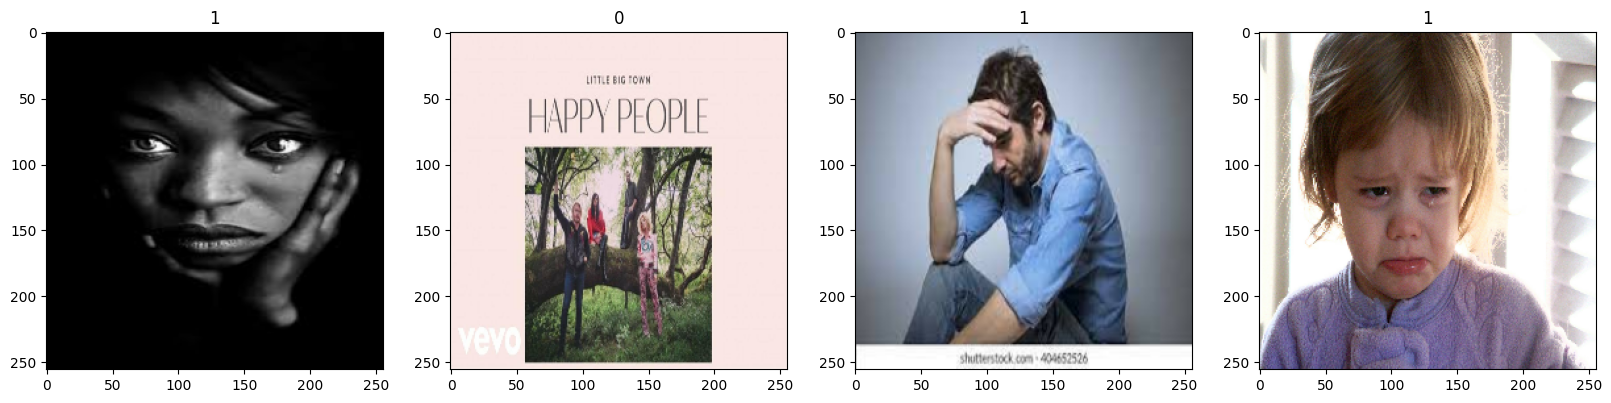

In [16]:
# batch[0] - Display image
# batch[1] - Set title
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

### 2.1 Scale Data

In [17]:
data.as_numpy_iterator().next()

(array([[[[  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ],
          ...,
          [  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ]],
 
         [[  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ],
          ...,
          [  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ]],
 
         [[  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ],
          ...,
          [  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ],
          [  2.      ,   4.      ,   3.      ]],
 
         ...,
 
         [[  2.      ,   4.      ,   3.      ],
          [  2.   

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[0.3882353 , 0.41960785, 0.4627451 ],
          [0.3884421 , 0.41981465, 0.4629519 ],
          [0.39250153, 0.42387408, 0.46701133],
          ...,
          [0.31799173, 0.32975644, 0.34936428],
          [0.31764707, 0.32941177, 0.34901962],
          [0.3099418 , 0.3217065 , 0.34131435]],
 
         [[0.38827756, 0.4196501 , 0.46278736],
          [0.39084712, 0.42221966, 0.46535692],
          [0.39469516, 0.42606774, 0.469205  ],
          ...,
          [0.31799173, 0.32975644, 0.34936428],
          [0.31764707, 0.32941177, 0.34901962],
          [0.31230453, 0.32406923, 0.34367707]],
 
         [[0.38969824, 0.42107078, 0.46420804],
          [0.39368415, 0.4250567 , 0.46819395],
          [0.39620095, 0.4275735 , 0.47071075],
          ...,
          [0.3192632 , 0.3310279 , 0.35063577],
          [0.31772056, 0.32948527, 0.3490931 ],
          [0.31379443, 0.32555914, 0.34516698]],
 
         ...,
 
         [[0.44886643, 0.44886643, 0.44886643],
          [0.98864

### 2.2 Split Data

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
train_size

7

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Model

### 3.1 Build Deep Learning Model

In [23]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

In [25]:
model = Sequential()

In [26]:
# Layer 1
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D()) # Default is 2*2

# Layer 2
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Layer 3
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Layer 4
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
# Adam Optimizer
# Binary Cross Entropy Loss
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### 3.2 Train

In [29]:
logdir='logs'

In [30]:
# Logs training data for visualization
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
# Training the keras model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 515ms/step - accuracy: 0.4704 - loss: 0.9840 - val_accuracy: 0.7031 - val_loss: 0.6645
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step - accuracy: 0.6612 - loss: 0.6382 - val_accuracy: 0.7969 - val_loss: 0.5540
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.7713 - loss: 0.5696 - val_accuracy: 0.7656 - val_loss: 0.5126
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 488ms/step - accuracy: 0.7546 - loss: 0.5058 - val_accuracy: 0.7969 - val_loss: 0.4625
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - accuracy: 0.7732 - loss: 0.4607 - val_accuracy: 0.8906 - val_loss: 0.3123
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 488ms/step - accuracy: 0.8946 - loss: 0.3098 - val_accuracy: 0.9219 - val_loss: 0.2267
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.9288 - loss: 0.2100 - val_accuracy: 0.8906 - val_loss: 0.2953
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step - accuracy: 0.9221 - loss: 0.2223 - val_accuracy: 0.9844 - val_loss:

### 3.3 Plot Performance

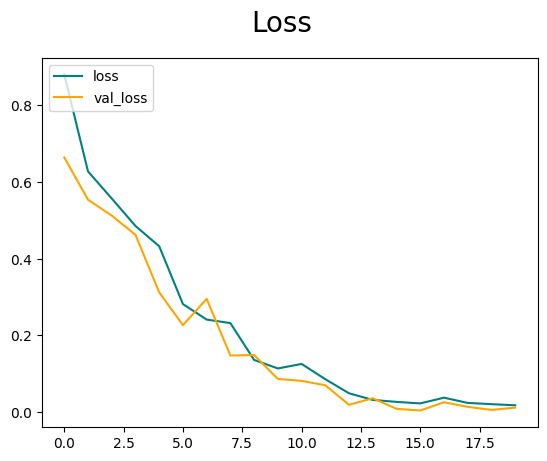

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

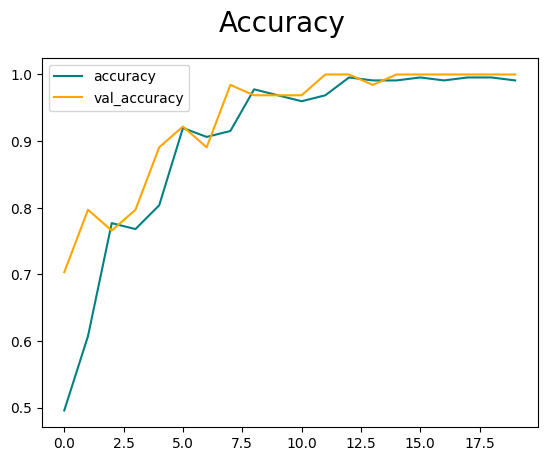

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

### 4.1 Evaluate

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import numpy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


2024-08-08 13:59:33.351564: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [43]:
print(f'Precision:{pre.result().numpy()}, Result:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Result:1.0, Accuracy:1.0


### 4.2 Test

In [44]:
import cv2

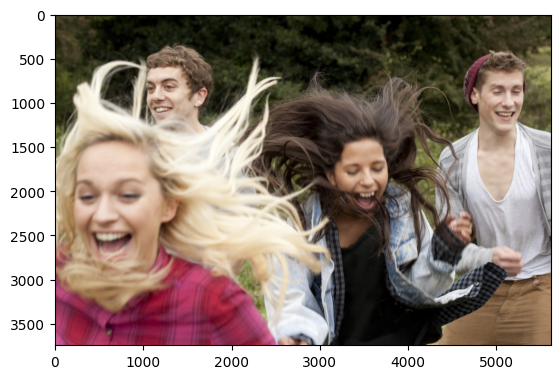

In [49]:
img = cv2.imread('154006829.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

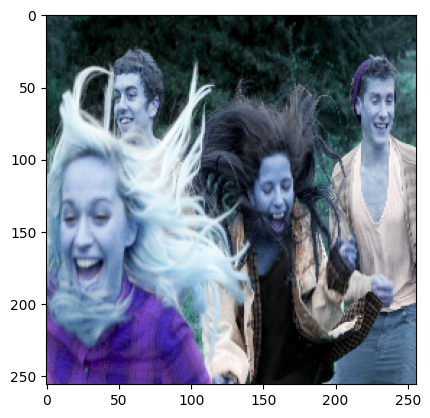

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 32.32617  ,  49.32617  ,  52.32617  ],
        [ 30.0625   ,  51.285156 ,  53.285156 ],
        [ 48.658203 ,  70.6582   ,  76.6582   ],
        ...,
        [ 20.164062 ,  38.033203 ,  44.753906 ],
        [ 12.8671875,  26.59375  ,  27.076172 ],
        [  1.5351562,  21.90039  ,  17.       ]],

       [[ 36.890625 ,  52.890625 ,  58.890625 ],
        [ 41.83203  ,  59.83203  ,  66.83203  ],
        [ 44.234375 ,  64.234375 ,  69.234375 ],
        ...,
        [ 20.558594 ,  38.558594 ,  45.558594 ],
        [ 26.798828 ,  39.39258  ,  42.20508  ],
        [ 21.9375   ,  37.277344 ,  34.34375  ]],

       [[ 34.501953 ,  56.501953 ,  61.970703 ],
        [ 43.57422  ,  65.75     ,  73.9375   ],
        [ 35.54492  ,  58.210938 ,  62.15039  ],
        ...,
        [ 26.642578 ,  47.98633  ,  55.29883  ],
        [ 28.90625  ,  46.79297  ,  55.34961  ],
        [ 22.626953 ,  40.814453 ,  41.876953 ]],

       ...,

     

In [55]:
resize.shape

TensorShape([256, 256, 3])

In [56]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [53]:
# Test the model
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [42]:
yhat

array([[0.01972741]], dtype=float32)

In [57]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 5. Save the Model

In [58]:
from tensorflow.keras.models import load_model

In [60]:
model.save(os.path.join('models','my_model.keras'))

In [63]:
new_model = load_model(os.path.join('models','my_model.keras'))

/home/fardeen/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [64]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.12321185]], dtype=float32)